## Proof of Concept - JPEG Compression

### This notebook shows the process of JPEG compression using python.

---


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


#### Step 1: Color Space Conversion (Only for color images)
The process of the JPEG starts with color space conversion. This process is not applicable to gray-scale image, where there is only one luminance component for gray scale image.



> Loading a rgb image  

matplotlib treats dimensions as (r,g,b)

Image loaded successfully.
Image shape: (256, 256, 3)
Image dtype: uint8
Image size: 196608 pixels
Image channels: 3
Image width: 256 pixels
Image height: 256 pixels


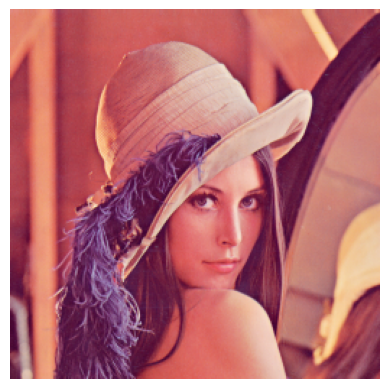

In [9]:
sample_color_image = os.path.join('..', 'images', 'lena_color_256.tif')
sample_color_image = cv2.imread(sample_color_image, cv2.IMREAD_UNCHANGED)

print('Image loaded successfully.')
print(f'Image shape: {sample_color_image.shape}')
print(f'Image dtype: {sample_color_image.dtype}')
print(f'Image size: {sample_color_image.size} pixels')
print(f'Image channels: {sample_color_image.shape[2]}')
print(f'Image width: {sample_color_image.shape[1]} pixels')
print(f'Image height: {sample_color_image.shape[0]} pixels')

# Convert BGR to RGB
sample_color_image_rgb = cv2.cvtColor(sample_color_image, cv2.COLOR_BGR2RGB)
plt.imshow(sample_color_image_rgb)
plt.axis('off')
plt.show()

> Converting to YCbCr space

Image channel shape: (256, 256, 3)


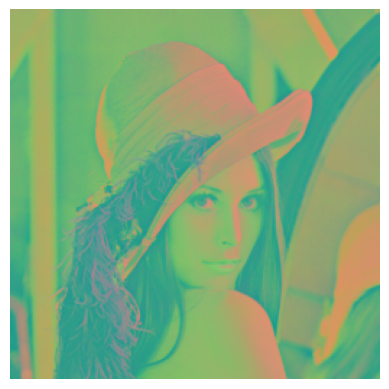

In [15]:
sample_color_image_ycbcr = cv2.cvtColor(sample_color_image, cv2.COLOR_BGR2YCrCb)
print(f'Image channel shape: {sample_color_image_ycbcr.shape}')
plt.imshow(sample_color_image_ycbcr)
plt.axis('off')
plt.show()

#### Step 2. Down Sampling (Only for Color images)
The transformation into the YCbCr color model enables the next step, which is to reduce the spatial resolution of the Cb and Cr components (called "down sampling" or "chroma sub sampling"). The ratios at which the down sampling can be done on JPEG are 4:4:4 (no down sampling), 4:2:2 (reduce by factor of 2 in horizontal direction), and most commonly 4:2:0(reduce by factor of 2 in horizontal and vertical directions).

> Implementing 4:2:0 (Horizontal and Vertical Subsampling)

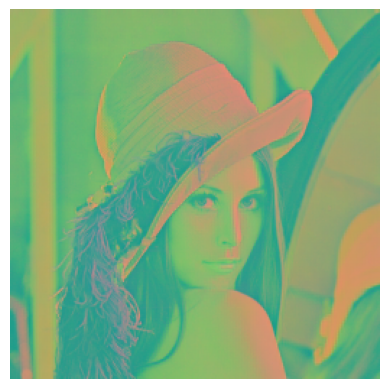

In [ ]:
# 4:2:0 subsampling on YCbCr image by taking mean for Cb and Cr channels
sample_color_image_ycbcr_subsampled = sample_color_image_ycbcr.copy()
sample_color_image_cb = sample_color_image_ycbcr[:, :, 1]
sample_color_image_cr = sample_color_image_ycbcr[:, :, 2]
sample_color_image_ycbcr_subsampled[::2, ::2, 1] = cv2.resize(sample_color_image_cb, (0, 0), fx=0.5, fy=0.5)
sample_color_image_ycbcr_subsampled[::2, ::2, 2] = cv2.resize(sample_color_image_cr, (0, 0), fx=0.5, fy=0.5)
sample_color_image_ycbcr_subsampled[1::2, ::2, 1] = sample_color_image_ycbcr_subsampled[::2, ::2, 1] 
sample_color_image_ycbcr_subsampled[1::2, ::2, 2] = sample_color_image_ycbcr_subsampled[::2, ::2, 2]
sample_color_image_ycbcr_subsampled[::2, 1::2, 1] = sample_color_image_ycbcr_subsampled[::2, ::2, 1]
sample_color_image_ycbcr_subsampled[::2, 1::2, 2] = sample_color_image_ycbcr_subsampled[::2, ::2, 2]
sample_color_image_ycbcr_subsampled[1::2, 1::2, 1] = sample_color_image_ycbcr_subsampled[::2, ::2, 1]
sample_color_image_ycbcr_subsampled[1::2, 1::2, 2] = sample_color_image_ycbcr_subsampled[::2, ::2, 2]

plt.imshow(sample_color_image_ycbcr_subsampled)
plt.axis('off')
plt.show()

Image loaded successfully.
Image shape: (256, 256)
Image dtype: uint8
Image size: 65536 pixels
Image width: 256 pixels
Image height: 256 pixels


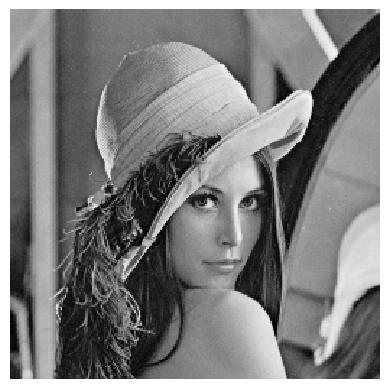

In [30]:
#loading a grayscale image
sample_gray_image = os.path.join('..', 'images', 'lena_gray_256.tif')
sample_gray_image = cv2.imread(sample_gray_image, cv2.IMREAD_UNCHANGED)
print('Image loaded successfully.')
print(f'Image shape: {sample_gray_image.shape}')
print(f'Image dtype: {sample_gray_image.dtype}')
print(f'Image size: {sample_gray_image.size} pixels')
print(f'Image width: {sample_gray_image.shape[1]} pixels')
print(f'Image height: {sample_gray_image.shape[0]} pixels')
plt.imshow(sample_gray_image, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

#### Step 3: Block Splitting
After sub sampling, each channel must be split into 8×8 blocks (of pixels).

Blocks shape: (32, 32, 8, 8)


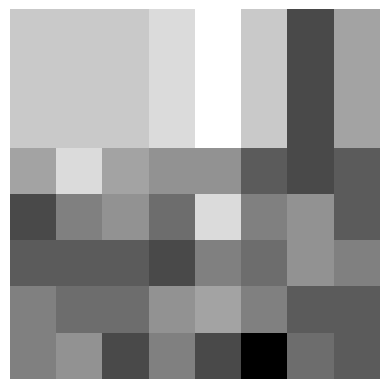

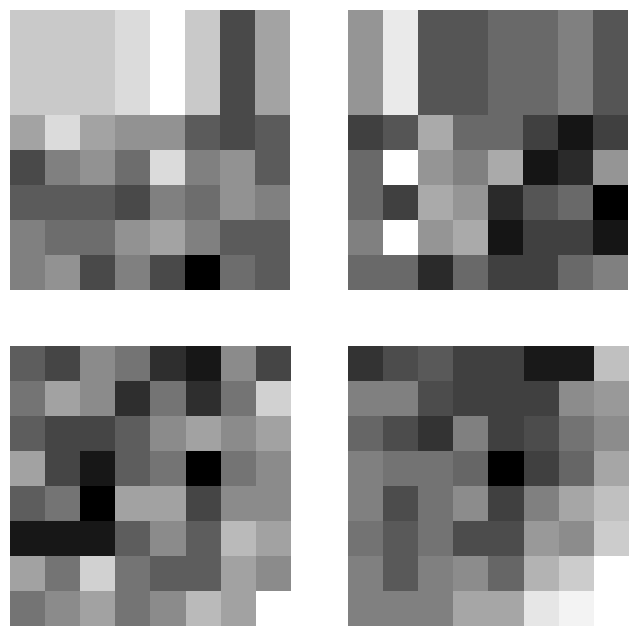

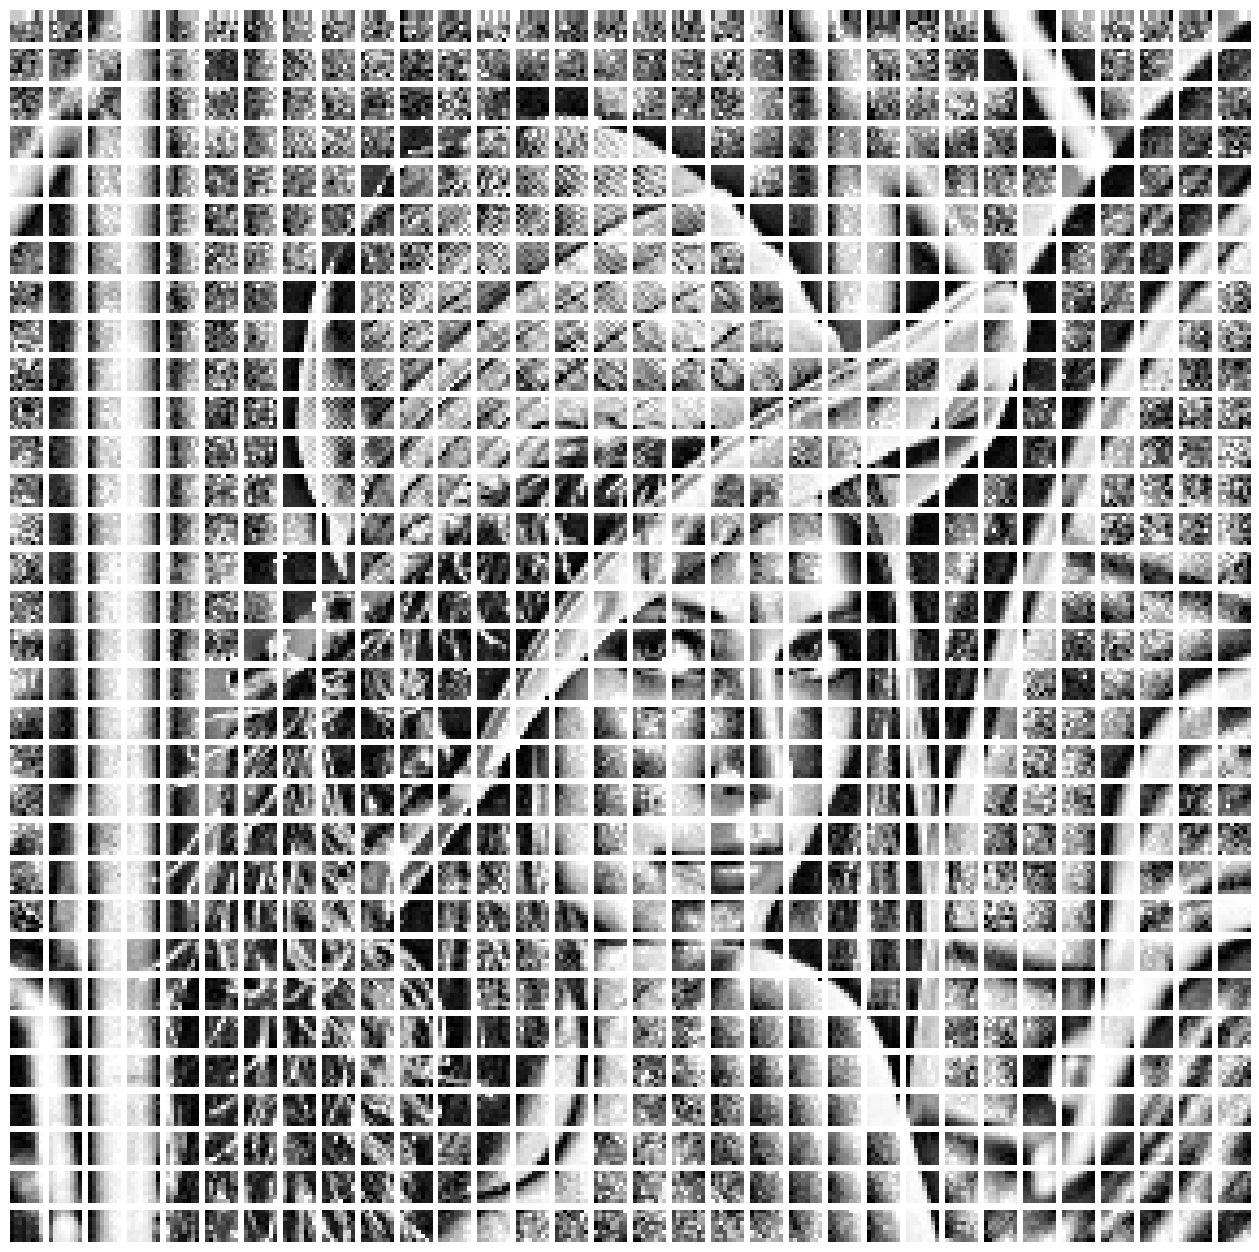

In [29]:
# splitting the image into blocks of 8x8 pixels
sample_gray_image_blocks = np.zeros((sample_gray_image.shape[0] // 8, sample_gray_image.shape[1] // 8, 8, 8), dtype=sample_gray_image.dtype)
for i in range(0, sample_gray_image.shape[0], 8):
    for j in range(0, sample_gray_image.shape[1], 8):
        sample_gray_image_blocks[i // 8, j // 8] = sample_gray_image[i:i + 8, j:j + 8]
print(f'Blocks shape: {sample_gray_image_blocks.shape}')
# Displaying the first block
plt.imshow(sample_gray_image_blocks[0, 0], cmap='gray')
plt.axis('off')
plt.show()
# Displaying the first 4 blocks
plt.figure(figsize=(8, 8))
for i in range(2):
    for j in range(2):
        plt.subplot(2, 2, i * 2 + j + 1)
        plt.imshow(sample_gray_image_blocks[i, j], cmap='gray')
        plt.axis('off')
plt.show()
# Displaying all blocks
plt.figure(figsize=(16, 16))
for i in range(sample_gray_image_blocks.shape[0]):
    for j in range(sample_gray_image_blocks.shape[1]):
        plt.subplot(sample_gray_image_blocks.shape[0], sample_gray_image_blocks.shape[1], i * sample_gray_image_blocks.shape[1] + j + 1)
        plt.imshow(sample_gray_image_blocks[i, j], cmap='gray')
        plt.axis('off')
plt.show()

These blocks are then passed into the DCT pipeline to extract coefficients for each of them